<a href="https://colab.research.google.com/github/kalyanSadhukhan/ML_LAB/blob/main/ML_EXP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of the dataset:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


None


Correlation between attributes:


,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


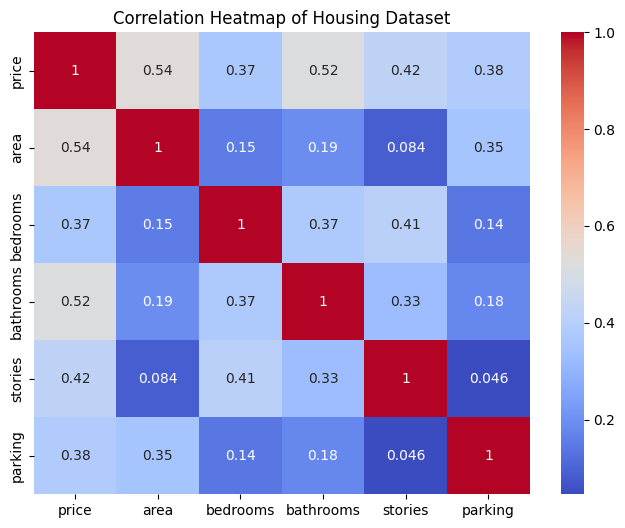

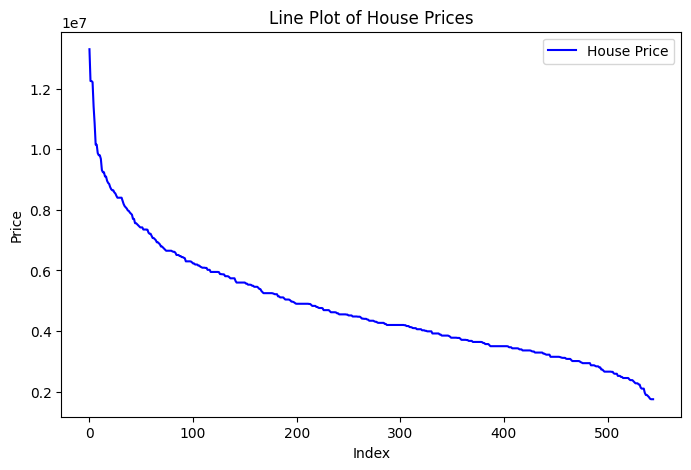

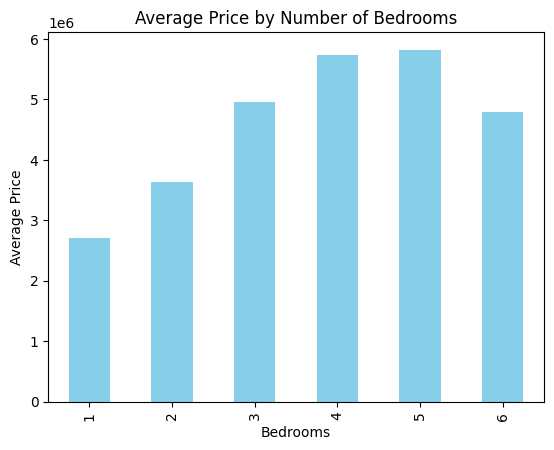

In [9]:
# -----------------------------
# (a) Read CSV and Find Correlation
# -----------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Step 1: Read the dataset
# Example: housing.csv should be in the same folder as this Python file

file_path = "Housing.csv"

if not os.path.exists(file_path):
  print(f"Error: The file '{file_path}' was not found.")
  print("Please upload the file to your Colab environment and run the cell again.")
  data = None # Set data to None to indicate that the file was not loaded
else:
  data = pd.read_csv(file_path)

  # Step 2: Display first few rows
  print("First 5 rows of the dataset:")
  display(data.head())

  # Step 3: Show basic information about data
  print("\nDataset Information:")
  display(data.info())

  # Step 4: Find correlation between numerical columns
  print("\nCorrelation between attributes:")
  correlation = data.corr(numeric_only=True)
  display(correlation)

  # Step 5: Plot correlation heatmap
  plt.figure(figsize=(8, 6))
  sns.heatmap(correlation, annot=True, cmap='coolwarm')
  plt.title("Correlation Heatmap of Housing Dataset")
  plt.show()

  # Step 6: Line plot for example attributes
  plt.figure(figsize=(8, 5))
  plt.plot(data['price'], label='House Price', color='blue')
  plt.xlabel('Index')
  plt.ylabel('Price')
  plt.title('Line Plot of House Prices')
  plt.legend()
  plt.show()


  # Step 7: Bar plot for average price by number of bedrooms (if available)
  if 'bedrooms' in data.columns:
      avg_price = data.groupby('bedrooms')['price'].mean()
      avg_price.plot(kind='bar', color='skyblue')
      plt.xlabel('Bedrooms')
      plt.ylabel('Average Price')
      plt.title('Average Price by Number of Bedrooms')
      plt.show()


  # Step 8: Pie chart for house distribution by location (if available)
  if 'location' in data.columns:
      location_counts = data['location'].value_counts().head(5)
      location_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
      plt.title('House Distribution by Top 5 Locations')
      plt.ylabel('')  # to remove y-label
      plt.show()

In [10]:
# -----------------------------
# (b) Data Cleaning
# -----------------------------

# Check if data is loaded before proceeding with cleaning
if data is not None:
  # Step 1: Check for missing values
  print("\nMissing values in each column:")
  display(data.isnull().sum())

  # Step 2: Handle missing values
  # Fill numerical columns with mean, categorical with mode
  for col in data.columns:
      if data[col].dtype == 'object':  # categorical column
          data[col] = data[col].fillna(data[col].mode()[0])
      else:
          data[col] = data[col].fillna(data[col].mean())

  print("\nMissing values after cleaning:")
  display(data.isnull().sum())

  # Step 3: Remove duplicate rows (if any)
  data = data.drop_duplicates()

  # Step 4: Check and handle outliers (using IQR method for numerical columns)
  numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
  for col in numeric_cols:
      Q1 = data[col].quantile(0.25)
      Q3 = data[col].quantile(0.75)
      IQR = Q3 - Q1
      lower = Q1 - 1.5 * IQR
      upper = Q3 + 1.5 * IQR
      # Keeping only non-outlier values
      data = data[(data[col] >= lower) & (data[col] <= upper)]

  print("\nDataset after removing outliers:")
  display(data.describe())

  # Step 5: Save the cleaned dataset
  data.to_csv("cleaned_housing.csv", index=False)
  print("\nCleaned dataset saved as 'cleaned_housing.csv'")
else:
  print("Data was not loaded. Please upload the file and run the first cell.")


Missing values in each column:


,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0



Missing values after cleaning:


,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0



Dataset after removing outliers:


,price,area,bedrooms,bathrooms,stories,parking
count,3.650000e+02,365.000000,365.000000,365.0,365.000000,365.000000
mean,4.045012e+06,4623.810959,2.742466,1.0,1.553425,0.536986
std,1.247181e+06,1723.729307,0.624130,0.0,0.616192,0.760911
min,1.750000e+06,1650.000000,1.000000,1.0,1.000000,0.000000
25%,3.150000e+06,3460.000000,2.000000,1.0,1.000000,0.000000
50%,3.850000e+06,4079.000000,3.000000,1.0,1.000000,0.000000
75%,4.690000e+06,5800.000000,3.000000,1.0,2.000000,1.000000
max,9.100000e+06,10360.000000,4.000000,1.0,3.000000,2.000000



Cleaned dataset saved as 'cleaned_housing.csv'
